# Capstone 2 
Polish Companies Bankruptcy


# Import statements


In [43]:
# Import pandas, matplotlib, seaborn, os, and scipy

from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Load the Data

In [44]:
# Load the 5 data columns in aarf format
# df1 - 1stYear the data contains financial rates from 1st year of the forecasting period and corresponding class label
#that indicates bankruptcy status after 5 years. The data contains 7027 instances (financial statements), 271 represents
#bankrupted companies, 6756 firms that did not bankrupt in the forecasting period.
# df2 - 2ndYear the data contains financial rates from 2nd year of the forecasting period and corresponding class label
#that indicates bankruptcy status after 4 years. The data contains 10173 instances (financial statements), 400 represents
#bankrupted companies, 9773 firms that did not bankrupt in the forecasting period.
# df3 - 3rdYear the data contains financial rates from 3rd year of the forecasting period and corresponding class label
#that indicates bankruptcy status after 3 years. The data contains 10503 instances (financial statements), 495 represents
#bankrupted companies, 10008 firms that did not bankrupt in the forecasting period.
# df4 - 4thYear the data contains financial rates from 4th year of the forecasting period and corresponding class label
#that indicates bankruptcy status after 2 years. The data contains 9792 instances (financial statements), 515 represents
#bankrupted companies, 9277 firms that did not bankrupt in the forecasting period.
# df5 - 5thYear the data contains financial rates from 5th year of the forecasting period and corresponding class label
#that indicates bankruptcy status after 1 year. The data contains 5910 instances (financial statements), 410 represents
#bankrupted companies, 5500 firms that did not bankrupt in the forecasting period.
data1 = arff.loadarff('1year.arff')
df1 = pd.DataFrame(data1[0])
data2 = arff.loadarff('2year.arff')
df2 = pd.DataFrame(data2[0])
data3 = arff.loadarff('3year.arff')
df3 = pd.DataFrame(data3[0])
data4 = arff.loadarff('4year.arff')
df4 = pd.DataFrame(data4[0])
data5 = arff.loadarff('5year.arff')
df5 = pd.DataFrame(data5[0])

##  Data Definitions

In [45]:
#data columns pre computed legend

'''data_columns= 

['net profit / total assets', 'total liabilities / total assets', 'working capital / total assets',
'current assets / short-term liabilities', '(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365',
'retained earnings / total assets', 'EBIT / total assets', 'book value of equity / total liabilities',
'sales / total assets', 'equity / total assets', '(gross profit + extraordinary items + financial expenses) / total assets',
'gross profit / short-term liabilities', '(gross profit + depreciation) / sales', '(gross profit + interest) / total assets',
'(total liabilities * 365) / (gross profit + depreciation)', '(gross profit + depreciation) / total liabilities',
'total assets / total liabilities', 'gross profit / total assets', 'gross profit / sales', '(inventory * 365) / sales',
'sales (n) / sales (n-1)', 'profit on operating activities / total assets', 'net profit / sales',
'gross profit (in 3 years) / total assets', '(equity - share capital) / total assets', 
'(net profit + depreciation) / total liabilities', 'profit on operating activities / financial expenses',
'working capital / fixed assets', 'logarithm of total assets', '(total liabilities - cash) / sales', '(gross profit + interest) / sales',
'(current liabilities * 365) / cost of products sold', 'operating expenses / short-term liabilities', 'operating expenses / total liabilities',
'profit on sales / total assets', 'total sales / total assets', '(current assets - inventories) / long-term liabilities',
'constant capital / total assets', 'profit on sales / sales', '(current assets - inventory - receivables) / short-term liabilities',
'total liabilities / ((profit on operating activities + depreciation) * (12/365))', 'profit on operating activities / sales',
'rotation receivables + inventory turnover in days', '(receivables * 365) / sales', 'net profit / inventory', 
'(current assets - inventory) / short-term liabilities', '(inventory * 365) / cost of products sold', 
'EBITDA (profit on operating activities - depreciation) / total assets', 'EBITDA (profit on operating activities - depreciation) / sales',
'current assets / total liabilities', 'short-term liabilities / total assets', '(short-term liabilities * 365) / cost of products sold)',
'equity / fixed assets', 'constant capital / fixed assets', 'working capital', '(sales - cost of products sold) / sales',
'(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)', 'total costs /total sales',
'long-term liabilities / equity', 'sales / inventory', 'sales / receivables', '(short-term liabilities *365) / sales',
'sales / short-term liabilities', 'sales / fixed assets', 'Bankrupt']'''

'''
X1 net profit / total assets
X2 total liabilities / total assets
X3 working capital / total assets
X4 current assets / short-term liabilities
X5 [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365
X6 retained earnings / total assets
X7 EBIT / total assets
X8 book value of equity / total liabilities
X9 sales / total assets
X10 equity / total assets
X11 (gross profit + extraordinary items + financial expenses) / total assets
X12 gross profit / short-term liabilities
X13 (gross profit + depreciation) / sales
X14 (gross profit + interest) / total assets
X15 (total liabilities * 365) / (gross profit + depreciation)
X16 (gross profit + depreciation) / total liabilities
X17 total assets / total liabilities
X18 gross profit / total assets
X19 gross profit / sales
X20 (inventory * 365) / sales
X21 sales (n) / sales (n-1)
X22 profit on operating activities / total assets
X23 net profit / sales
X24 gross profit (in 3 years) / total assets
X25 (equity - share capital) / total assets
X26 (net profit + depreciation) / total liabilities
X27 profit on operating activities / financial expenses
X28 working capital / fixed assets
X29 logarithm of total assets
X30 (total liabilities - cash) / sales
X31 (gross profit + interest) / sales
X32 (current liabilities * 365) / cost of products sold
X33 operating expenses / short-term liabilities
X34 operating expenses / total liabilities
X35 profit on sales / total assets
X36 total sales / total assets
X37 (current assets - inventories) / long-term liabilities
X38 constant capital / total assets
X39 profit on sales / sales
X40 (current assets - inventory - receivables) / short-term liabilities
X41 total liabilities / ((profit on operating activities + depreciation) * (12/365))
X42 profit on operating activities / sales
X43 rotation receivables + inventory turnover in days
X44 (receivables * 365) / sales
X45 net profit / inventory
X46 (current assets - inventory) / short-term liabilities
X47 (inventory * 365) / cost of products sold
X48 EBITDA (profit on operating activities - depreciation) / total assets
X49 EBITDA (profit on operating activities - depreciation) / sales
X50 current assets / total liabilities
X51 short-term liabilities / total assets
X52 (short-term liabilities * 365) / cost of products sold)
X53 equity / fixed assets
X54 constant capital / fixed assets
X55 working capital
X56 (sales - cost of products sold) / sales
X57 (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)
X58 total costs /total sales
X59 long-term liabilities / equity
X60 sales / inventory
X61 sales / receivables
X62 (short-term liabilities *365) / sales
X63 sales / short-term liabilities
X64 sales / fixed assets
X65 bankrupt = 1 

'''

'\nX1 net profit / total assets\nX2 total liabilities / total assets\nX3 working capital / total assets\nX4 current assets / short-term liabilities\nX5 [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365\nX6 retained earnings / total assets\nX7 EBIT / total assets\nX8 book value of equity / total liabilities\nX9 sales / total assets\nX10 equity / total assets\nX11 (gross profit + extraordinary items + financial expenses) / total assets\nX12 gross profit / short-term liabilities\nX13 (gross profit + depreciation) / sales\nX14 (gross profit + interest) / total assets\nX15 (total liabilities * 365) / (gross profit + depreciation)\nX16 (gross profit + depreciation) / total liabilities\nX17 total assets / total liabilities\nX18 gross profit / total assets\nX19 gross profit / sales\nX20 (inventory * 365) / sales\nX21 sales (n) / sales (n-1)\nX22 profit on operating activities / total assets\nX23 net profit / sales\nX24 gross pro

## Assign the column headings

In [46]:
# function to assign column headings ranging from X1 to X65  

def assign_columns(data_file):
    data_columns = []
    for i in range(64):
        data_columns.append("X" + str(i + 1))
    
    data_columns.append('Class')
    data_file.columns = data_columns

# assign column headings to each file    
assign_columns(df1)
assign_columns(df2)
assign_columns(df3)
assign_columns(df4)
assign_columns(df5)

# assign a new year column to each data file
df1['Year'] = 1
df2['Year'] = 2
df3['Year'] = 3
df4['Year'] = 4
df5['Year'] = 5

## Combine files into one dataframe

In [47]:
#  compile all dataframes into one complete dataframe

complete = [df1,df2,df3,df4,df5]
complete_df = pd.concat(complete, ignore_index = True)

## Inspect summary data 

In [48]:
#call info method to inspect for null entries 

complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 66 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      43397 non-null  float64
 1   X2      43397 non-null  float64
 2   X3      43397 non-null  float64
 3   X4      43271 non-null  float64
 4   X5      43316 non-null  float64
 5   X6      43397 non-null  float64
 6   X7      43397 non-null  float64
 7   X8      43311 non-null  float64
 8   X9      43396 non-null  float64
 9   X10     43397 non-null  float64
 10  X11     43361 non-null  float64
 11  X12     43271 non-null  float64
 12  X13     43278 non-null  float64
 13  X14     43397 non-null  float64
 14  X15     43369 non-null  float64
 15  X16     43310 non-null  float64
 16  X17     43311 non-null  float64
 17  X18     43397 non-null  float64
 18  X19     43277 non-null  float64
 19  X20     43278 non-null  float64
 20  X21     37551 non-null  float64
 21  X22     43397 non-null  float64
 22

## Inspect data

In [49]:
#inspect first 20 columns
complete_df.head(20)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Class,Year
0,0.200550,0.379510,0.396410,2.0472,32.3510,0.388250,0.249760,1.33050,1.13890,0.50494,...,0.397180,0.87804,0.001924,8.4160,5.1372,82.6580,4.4158,7.42770,b'0',1
1,0.209120,0.499880,0.472250,1.9447,14.7860,0.000000,0.258340,0.99601,1.69960,0.49788,...,0.420020,0.85300,0.000000,4.1486,3.2732,107.3500,3.4000,60.98700,b'0',1
2,0.248660,0.695920,0.267130,1.5548,-1.1523,0.000000,0.309060,0.43695,1.30900,0.30408,...,0.817740,0.76599,0.694840,4.9909,3.9510,134.2700,2.7185,5.20780,b'0',1
3,0.081483,0.307340,0.458790,2.4928,51.9520,0.149880,0.092704,1.86610,1.05710,0.57353,...,0.142070,0.94598,0.000000,4.5746,3.6147,86.4350,4.2228,5.54970,b'0',1
4,0.187320,0.613230,0.229600,1.4063,-7.3128,0.187320,0.187320,0.63070,1.15590,0.38677,...,0.484310,0.86515,0.124440,6.3985,4.3158,127.2100,2.8692,7.89800,b'0',1
5,0.228220,0.497940,0.359690,1.7502,-47.7170,0.000000,0.281390,1.00830,1.97860,0.50206,...,0.454570,0.85891,0.023002,3.4028,8.9949,88.4440,4.1269,12.29900,b'0',1
6,0.111090,0.647440,0.289710,1.4705,2.5349,0.000000,0.111090,0.54454,1.73480,0.35256,...,0.315100,0.40871,0.000000,6.3222,2.9098,129.5500,2.8173,18.35200,b'0',1
7,0.532320,0.027059,0.705540,53.9540,299.5800,0.000000,0.652400,35.95700,0.65273,0.97294,...,0.547130,0.49521,0.013194,9.1300,82.0500,7.4503,48.9910,2.32170,b'0',1
8,0.009020,0.632020,0.053735,1.1263,-37.8420,0.000000,0.014434,0.58223,1.33320,0.36798,...,0.024512,0.84165,0.340940,9.9665,4.2382,116.5000,3.1330,2.56030,b'0',1
9,0.124080,0.838370,0.142040,1.1694,-91.8830,0.000000,0.153280,0.19279,2.11560,0.16163,...,0.767680,0.92847,0.000000,3.3192,6.4994,144.6300,2.5236,107.67000,b'0',1


## Inspect for unique bankrupt identifier

In [56]:
# run unique to ensure two qualifiers
complete_df['Class'].unique()

array([0, 1], dtype=object)

## Reclassify bankruptcy indicator

In [51]:
# change indicator to 0 or 1 
complete_df.loc[complete_df['Class'] == b'0', 'Class'] = 0
complete_df.loc[complete_df['Class'] == b'1', 'Class'] = 1
complete_df['Class'].unique()

array([0, 1], dtype=object)

## Compute missing value percentages

In [52]:
#
null_sum = complete_df.isnull().sum()
null_percent = (100 * complete_df.isnull().mean())
missing = pd.DataFrame({'count': null_sum , '%' : null_percent})
missing.sort_values(by='count', ascending = False)

,count,%
X37,18984,43.736897
X21,5854,13.486925
X27,2764,6.367930
X60,2152,4.957954
X45,2147,4.946435
...,...,...
X57,7,0.016127
X59,7,0.016127
X55,1,0.002304
Class,0,0.000000


In [53]:
complete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,43397.0,0.035160,2.994109,-4.638900e+02,0.003429,0.04966,0.12958,9.428000e+01
X2,43397.0,0.590212,5.842748,-4.308700e+02,0.268980,0.47190,0.68832,4.809600e+02
X3,43397.0,0.114431,5.439429,-4.799600e+02,0.021521,0.19661,0.40339,2.833600e+01
X4,43271.0,6.314702,295.434425,-4.031100e-01,1.049500,1.56980,2.78745,5.343300e+04
X5,43316.0,-385.346602,61243.025874,-1.190300e+07,-49.080000,-1.03450,50.63425,1.250100e+06
...,...,...,...,...,...,...,...,...
X61,43303.0,17.033202,553.049406,-1.265600e+01,4.510150,6.63630,10.39450,1.080000e+05
X62,43278.0,1502.327833,139266.699576,-2.336500e+06,42.144000,71.32600,117.22000,2.501600e+07
X63,43271.0,9.343074,124.177354,-1.543200e+00,3.097650,5.08760,8.59885,2.345400e+04
X64,42593.0,72.788592,2369.339482,-1.067700e+04,2.176800,4.28250,9.77620,2.947700e+05


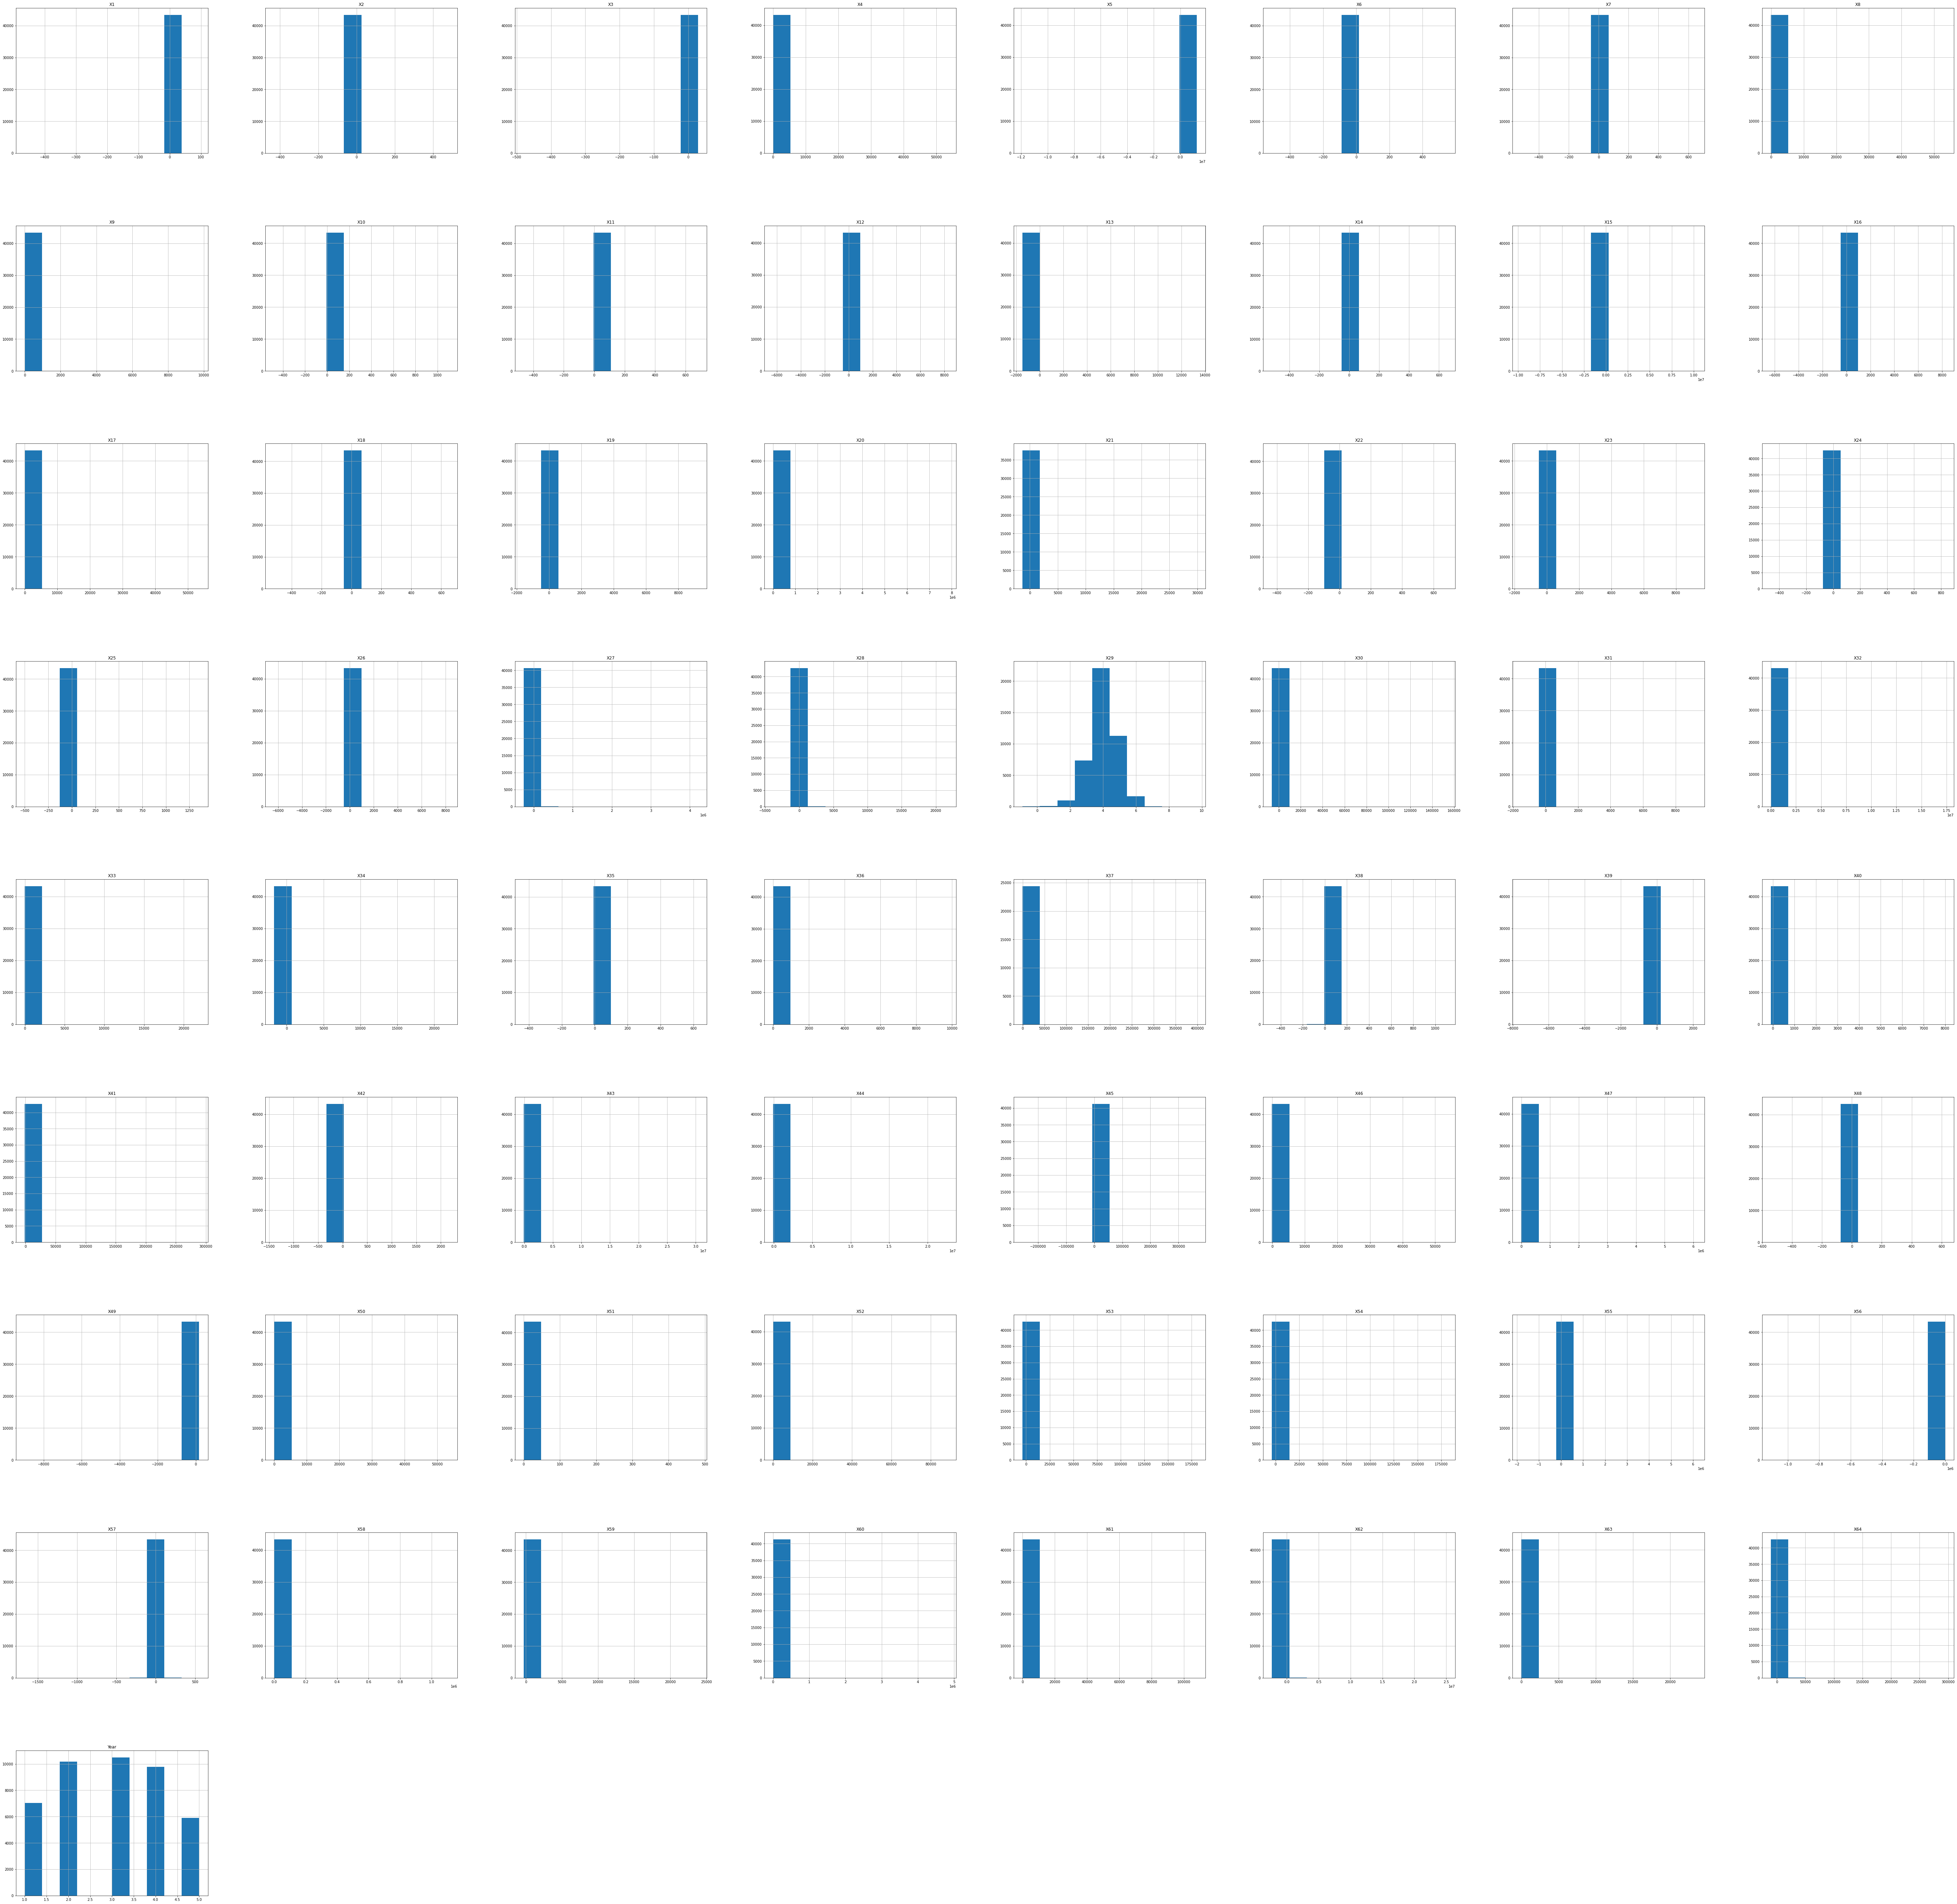

In [54]:
complete_df.hist(figsize=(100,100))
plt.subplots_adjust(hspace=0.5);